<a href="https://colab.research.google.com/github/PaulineKS/PythonProjects/blob/main/CAPSTONE_PROJECT_NYPD_ARREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
#importing data
df = pd.read_csv('https://data.cityofnewyork.us/resource/uip8-fykc.csv')
df

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
0,238552639,2022-01-03T00:00:00.000,205.0,"TRESPASS 2, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401501,M,K,75,0,18-24,M,BLACK,1015028,185895,40.676863,-73.889037,POINT (-73.889037 40.676863)
1,238682242,2022-01-05T00:00:00.000,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160050H,F,K,75,0,25-44,M,BLACK,1017119,183909,40.671404,-73.881509,POINT (-73.881509 40.671404)
2,238723993,2022-01-06T00:00:00.000,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,25-44,M,WHITE,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
3,238821533,2022-01-08T00:00:00.000,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,45-64,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
4,239029586,2022-01-12T00:00:00.000,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,239678172,2022-01-25T00:00:00.000,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,90,2,25-44,F,BLACK,998002,196692,40.706548,-73.950401,POINT (-73.9504006335643 40.7065483947783)
996,239220231,2022-01-16T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,68,0,45-64,M,WHITE,978700,170198,40.633831,-74.019993,POINT (-74.019993 40.633831)
997,241650053,2022-03-06T00:00:00.000,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1456002,M,K,66,0,25-44,M,WHITE HISPANIC,990817,167525,40.626492,-73.976342,POINT (-73.976342 40.626492)
998,240305373,2022-02-08T00:00:00.000,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,71,0,25-44,M,WHITE HISPANIC,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)


In [ ]:
#Column Names
df.columns


Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column'],
      dtype='object')

In [ ]:
#type
df.dtypes

arrest_key             int64
arrest_date           object
pd_cd                float64
pd_desc               object
ky_cd                float64
ofns_desc             object
law_code              object
law_cat_cd            object
arrest_boro           object
arrest_precinct        int64
jurisdiction_code      int64
age_group             object
perp_sex              object
perp_race             object
x_coord_cd             int64
y_coord_cd             int64
latitude             float64
longitude            float64
geocoded_column       object
dtype: object

In [ ]:
# Checking if Arrest Key is unique
df['arrest_key'].is_unique

True

In [ ]:
##Picking Features(in columns) to be considered for analysis. 
#MAIN FEATURE CONSIDERED FOR ANALYSIS- Race, Sex, Borough and Age wrt offence type
Offences=df[['arrest_key','age_group','perp_sex','pd_desc','perp_race','arrest_boro']]
Offences

,arrest_key,age_group,perp_sex,pd_desc,perp_race,arrest_boro
0,238552639,18-24,M,"TRESPASS 2, CRIMINAL",BLACK,K
1,238682242,25-44,M,"ROBBERY,OPEN AREA UNCLASSIFIED",BLACK,K
2,238723993,25-44,M,RAPE 3,WHITE,K
3,238821533,45-64,M,(null),WHITE HISPANIC,Q
4,239029586,25-44,M,(null),WHITE HISPANIC,Q
...,...,...,...,...,...,...
995,239678172,25-44,F,"ASSAULT 2,1,UNCLASSIFIED",BLACK,K
996,239220231,45-64,M,ASSAULT 3,WHITE,K
997,241650053,25-44,M,"CRIMINAL MISCHIEF 4TH, GRAFFIT",WHITE HISPANIC,K
998,240305373,25-44,M,ASSAULT 3,WHITE HISPANIC,K


In [ ]:
#Renaming the columns
Offences.rename(columns= {'arrest_key': 'Arrest ID','age_group': 'Age Group','perp_sex': 'Gender', 'pd_desc': 'Offence Type', 'perp_race': 'Race','arrest_boro':'Borough'}, inplace=True)
Offences

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Arrest ID,Age Group,Gender,Offence Type,Race,Borough
0,238552639,18-24,M,"TRESPASS 2, CRIMINAL",BLACK,K
1,238682242,25-44,M,"ROBBERY,OPEN AREA UNCLASSIFIED",BLACK,K
2,238723993,25-44,M,RAPE 3,WHITE,K
3,238821533,45-64,M,(null),WHITE HISPANIC,Q
4,239029586,25-44,M,(null),WHITE HISPANIC,Q
...,...,...,...,...,...,...
995,239678172,25-44,F,"ASSAULT 2,1,UNCLASSIFIED",BLACK,K
996,239220231,45-64,M,ASSAULT 3,WHITE,K
997,241650053,25-44,M,"CRIMINAL MISCHIEF 4TH, GRAFFIT",WHITE HISPANIC,K
998,240305373,25-44,M,ASSAULT 3,WHITE HISPANIC,K


In [ ]:
#Null  value check. Missing value
Offences.isnull().sum()

Arrest ID       0
Age Group       0
Gender          0
Offence Type    0
Race            0
Borough         0
dtype: int64

In [ ]:
#Replace null as Unknown Offence
Offences.replace(to_replace ='(null)',
                value ='Unknown Offence')

,Arrest ID,Age Group,Gender,Offence Type,Race,Borough
0,238552639,18-24,M,"TRESPASS 2, CRIMINAL",BLACK,K
1,238682242,25-44,M,"ROBBERY,OPEN AREA UNCLASSIFIED",BLACK,K
2,238723993,25-44,M,RAPE 3,WHITE,K
3,238821533,45-64,M,Unknown Offence,WHITE HISPANIC,Q
4,239029586,25-44,M,Unknown Offence,WHITE HISPANIC,Q
...,...,...,...,...,...,...
995,239678172,25-44,F,"ASSAULT 2,1,UNCLASSIFIED",BLACK,K
996,239220231,45-64,M,ASSAULT 3,WHITE,K
997,241650053,25-44,M,"CRIMINAL MISCHIEF 4TH, GRAFFIT",WHITE HISPANIC,K
998,240305373,25-44,M,ASSAULT 3,WHITE HISPANIC,K


In [ ]:
#Group offenses into Race and Offence Type
Race_Based= Offences.groupby(['Race', 'Offence Type'])['Offence Type'].count()
Race_Based

Race                            Offence Type                             
AMERICAN INDIAN/ALASKAN NATIVE  ASSAULT 2,1,UNCLASSIFIED                      2
                                LARCENY,GRAND FROM OPEN AREAS, UNATTENDED     1
                                LARCENY,PETIT FROM OPEN AREAS,                1
                                STOLEN PROPERTY 3,POSSESSION                  1
ASIAN / PACIFIC ISLANDER        AGGRAVATED CRIMINAL CONTEMPT                  1
                                                                             ..
WHITE HISPANIC                  TRAFFIC,UNCLASSIFIED MISDEMEAN               10
                                U.S. CODE UNCLASSIFIED                        1
                                WEAPONS POSSESSION 1 & 2                      6
                                WEAPONS POSSESSION 3                          2
                                WEAPONS, POSSESSION, ETC                      1
Name: Offence Type, Length: 228, dtype: int64

In [ ]:
Race_Based_1= Offences.groupby(['Race'])['Offence Type'].count().sort_values(ascending=False)
Race_Based_1

Race
BLACK                             515
WHITE HISPANIC                    237
WHITE                             115
BLACK HISPANIC                     80
ASIAN / PACIFIC ISLANDER           44
AMERICAN INDIAN/ALASKAN NATIVE      5
UNKNOWN                             4
Name: Offence Type, dtype: int64

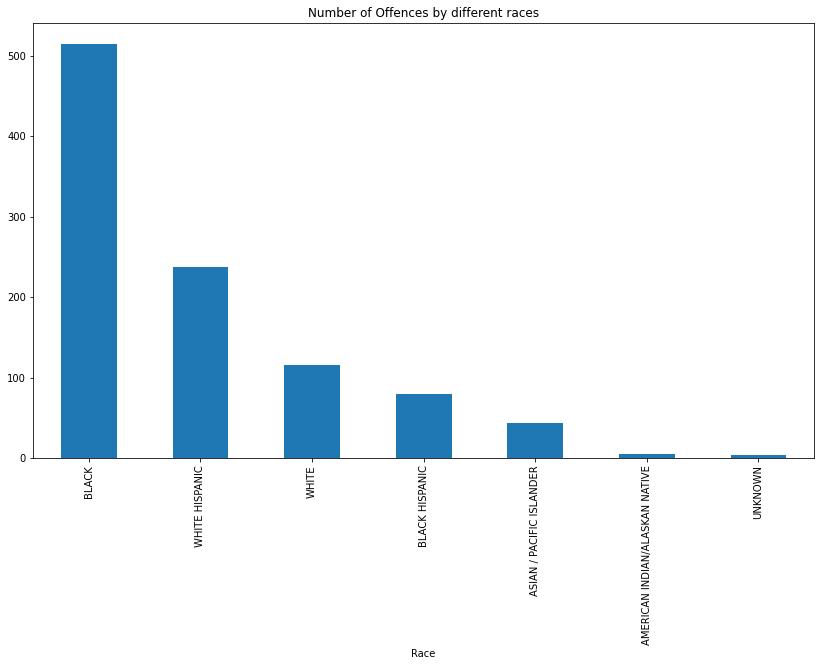

In [ ]:
#Visualization of Offences over Race- Highest Offence mapped to be committed by Blacks and lowest mapped to be commited by American Indian/Alaskan Native
Race_Based_1.plot(kind='bar', figsize=(14,8), title = 'Number of Offences by different races')

In [ ]:
#Gender Based analysis against Offences
Gender_based= Offences.groupby(['Gender', 'Offence Type'])['Offence Type'].count().sort_values(ascending=False)
Gender_based

Gender  Offence Type                  
M       ASSAULT 3                         107
        LARCENY,PETIT FROM OPEN AREAS,     66
        ROBBERY,OPEN AREA UNCLASSIFIED     50
        ASSAULT 2,1,UNCLASSIFIED           39
        FORGERY,ETC.-MISD.                 34
                                         ... 
        RAPE 2                              1
        COURSE OF SEXUAL CONDUCT AGAIN      1
        CONTROLLED SUBSTANCE, INTENT T      1
F       FUGITIVE/OTHER STATES               1
        LEAVING SCENE-ACCIDENT-PERSONA      1
Name: Offence Type, Length: 124, dtype: int64

In [ ]:
Gender_Based_1= Offences.groupby(['Gender'])['Offence Type'].count().sort_values(ascending=False)
Gender_Based_1

Gender
M    828
F    172
Name: Offence Type, dtype: int64

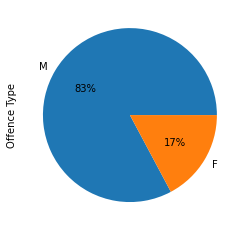

In [ ]:
#Visualization of Offences over Gender- Highest Offence(83%) committed by Male and lowest(17%) Females
Gender_Based_1.plot(kind='pie', y='Gender', autopct='%1.0f%%')

In [ ]:
#Looking into Age group and Gender to offences
Age_Gender= Offences.groupby(['Age Group','Gender', 'Offence Type'])['Offence Type'].count()
Age_Gender

Age Group  Gender  Offence Type                  
18-24      F       (null)                            1
                   AGGRAVATED CRIMINAL CONTEMPT      1
                   AGGRAVATED HARASSMENT 2           2
                   ASSAULT 2,1,UNCLASSIFIED          2
                   ASSAULT 3                         7
                                                    ..
<18        M       MURDER,UNCLASSIFIED               1
                   OBSTR BREATH/CIRCUL               1
                   ROBBERY,OPEN AREA UNCLASSIFIED    2
                   SEXUAL ABUSE 3,2                  1
                   STOLEN PROPERTY-MOTOR VEH 2ND,    1
Name: Offence Type, Length: 265, dtype: int64

In [ ]:
Age_Gender_1= Offences.groupby(['Age Group','Gender'])['Offence Type'].count()
Age_Gender_1

Age Group  Gender
18-24      F          36
           M         149
25-44      F         100
           M         464
45-64      F          30
           M         181
65+        F           3
           M          11
<18        F           3
           M          23
Name: Offence Type, dtype: int64

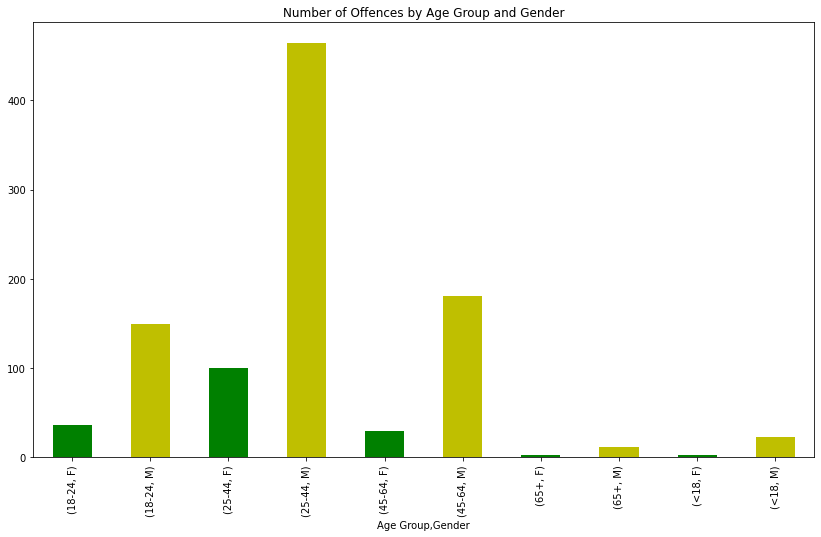

In [ ]:
#Analysis points to highest crime in Male and Female is committed in the age group of 25-44 and lowestr os 65>
Age_Gender_1.plot(kind='bar', figsize=(14,8), title = 'Number of Offences by Age Group and Gender', color = ['g', 'y'])


In [ ]:
#Looking into offences
Offence_Type= Offences.groupby(['Offence Type'])['Offence Type'].count().sort_values(ascending=False)
Offence_Type.head(20)

Offence Type
ASSAULT 3                                    137
LARCENY,PETIT FROM OPEN AREAS,                87
ASSAULT 2,1,UNCLASSIFIED                      62
ROBBERY,OPEN AREA UNCLASSIFIED                53
PUBLIC ADMINISTRATION,UNCLASSI                39
FORGERY,ETC.-MISD.                            38
LARCENY,GRAND FROM OPEN AREAS, UNATTENDED     35
TRAFFIC,UNCLASSIFIED MISDEMEAN                33
BURGLARY,UNCLASSIFIED,UNKNOWN                 32
MENACING,UNCLASSIFIED                         27
WEAPONS POSSESSION 1 & 2                      24
CONTROLLED SUBSTANCE, POSSESSI                24
CRIMINAL MIS 2 & 3                            22
(null)                                        21
STRANGULATION 1ST                             21
CONTEMPT,CRIMINAL                             20
INTOXICATED DRIVING,ALCOHOL                   20
CRIMINAL MISCHIEF,UNCLASSIFIED 4              18
FORGERY,ETC.,UNCLASSIFIED-FELO                17
CHILD, ENDANGERING WELFARE                    15
Name: O

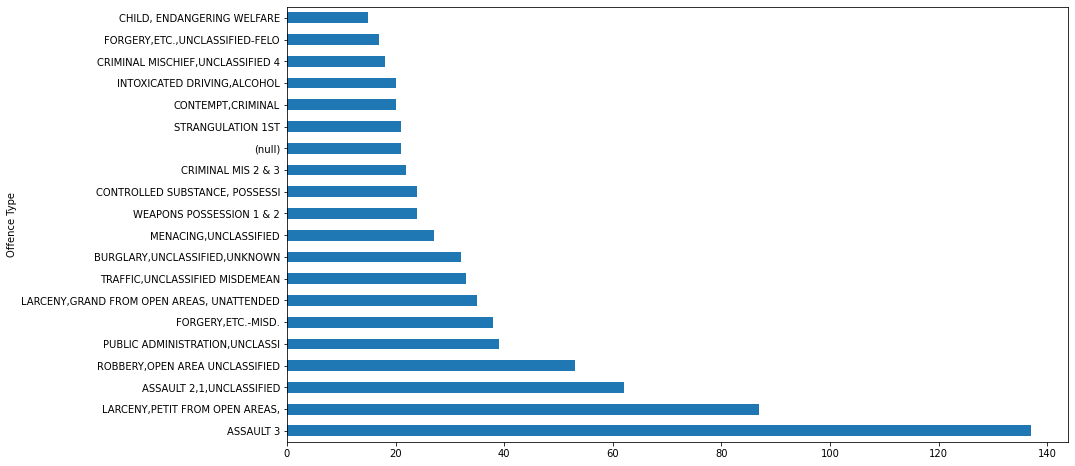

In [ ]:
#Analysis points to highest Offence is Assault
Offence_Type.head(20).plot(kind='barh', figsize=(14,8))

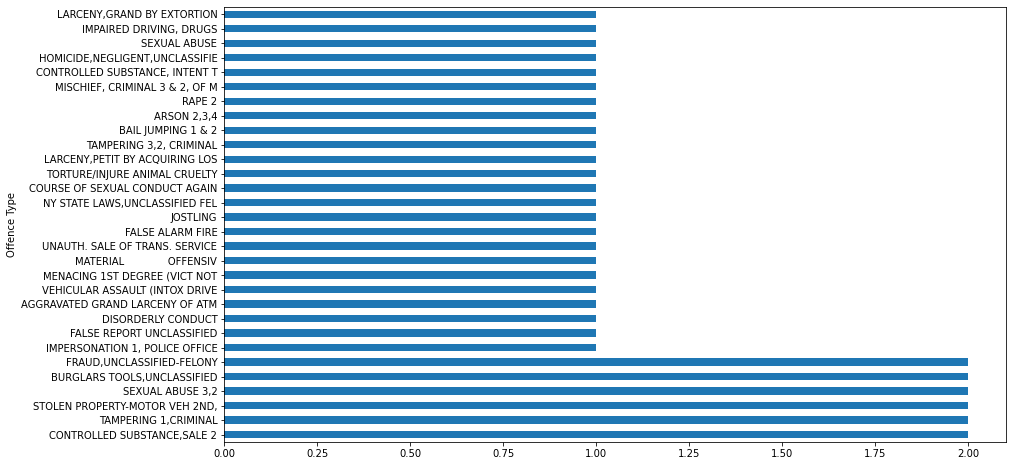

In [ ]:
#Analysis points to Lowest Offence as mentioned below
Offence_Type.tail(30).plot(kind='barh', figsize=(14,8))

In [ ]:
#Borough Based analysis against Offences
Borough_based= Offences.groupby(['Borough'])['Offence Type'].count().sort_values(ascending=False)
Borough_based

Borough
K    304
Q    224
M    216
B    197
S     59
Name: Offence Type, dtype: int64

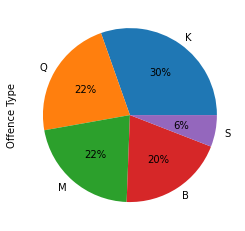

In [ ]:
#Visualization of Offences over Borough- Highest Offence(30%) is committed in Brooklyn(30%) and lowest(6%) in Staten Island. This depends on the population per capita
Borough_based.plot(kind='pie', y='Borough', autopct='%1.0f%%')

In [ ]:
#Borough Based analysis against Offences
Borough_Gender_based= Offences.groupby(['Borough', 'Gender'])['Offence Type'].count()
Borough_Gender_based

Borough  Gender
B        F          31
         M         166
K        F          47
         M         257
M        F          40
         M         176
Q        F          41
         M         183
S        F          13
         M          46
Name: Offence Type, dtype: int64

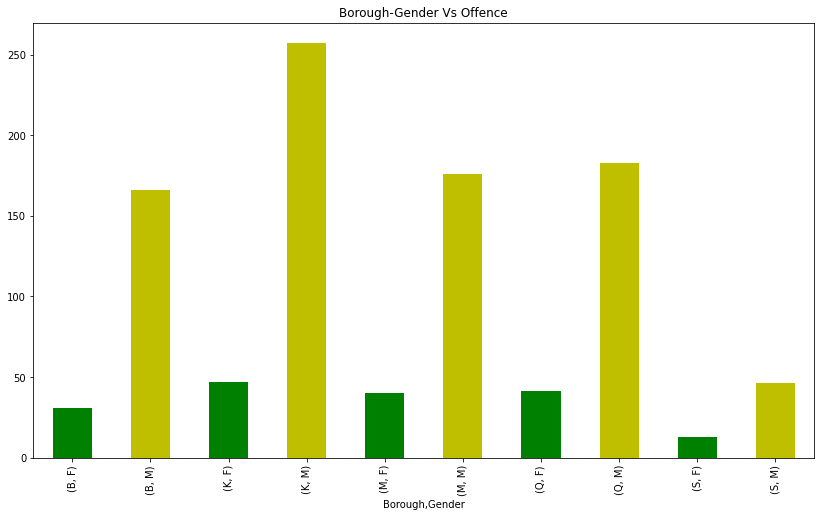

In [ ]:
#Analysis points to highest crime done by Male & female in Brooklyn and lowest crime done by Male and Female in Staten Island.However, the population density is also higher and lower in the mentioned boroughs respectively
Borough_Gender_based.plot(kind='bar', figsize=(14,8), title = 'Borough-Gender Vs Offence', color = ['g', 'y'])

ANALYSIS ON MOST COMMITTED OFFENCE BY WHICH RACE, GENDER AND AGE GROUP

In [ ]:
#Looking into offences
Offence_Type_2= Offences.groupby(['Offence Type','Race','Age Group','Gender'])['Offence Type'].count().sort_values(ascending=False)
Offence_Type_2.head(5)

Offence Type                    Race   Age Group  Gender
ASSAULT 3                       BLACK  25-44      M         33
ROBBERY,OPEN AREA UNCLASSIFIED  BLACK  25-44      M         19
FORGERY,ETC.-MISD.              BLACK  25-44      M         15
LARCENY,PETIT FROM OPEN AREAS,  BLACK  25-44      M         15
ASSAULT 2,1,UNCLASSIFIED        BLACK  25-44      F         13
Name: Offence Type, dtype: int64

Analysis shows Highest Crime Assault 3 committed by Male black within age group 25-44 and the highest female crime is Unclassified Assault 1,2 committed by Black within age group of 25-44 

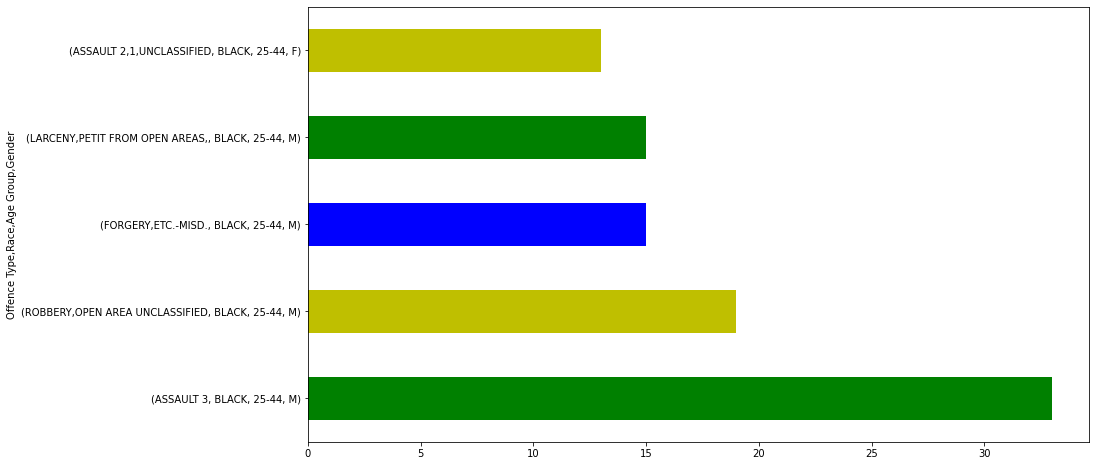

In [ ]:
Offence_Type_2.head(5).plot(kind='barh', figsize=(14,8), color = ['g', 'y','b'])

As per the above analysis
-Most offences are committed by Black Race
-Age group with highest offences are 25-44
-Brooklyn borough has shown most offences, however this is not mapped against population but only wrt overall offences count
-Top 5 offences are done by Men of Black race within 25-44 age group